# MIE 1147 Assignment 3: Feature engineering

##  1.1 Import the data and create the anchor date columns

In [1]:
import pandas as pd

In [2]:
txn = pd.read_csv('Retail_Data_Transactions.csv')   #1.1.1: import the dataset
print('There are {} rows.'.format(txn.shape[0]))   #1.1.1: identify the number of rows
txn.head()

There are 125000 rows.


,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [3]:
txn['txn_date'] = pd.to_datetime(txn.trans_date)    #1.1.2
txn.drop(columns = 'trans_date', inplace=True)
print(txn.txn_date.agg([min,max]))                #1.1.3 Identify the min() and max() of column ’txn_date’.
txn['ME_DT']= txn.txn_date+pd.offsets.MonthEnd(n=0)   #1.1.4 Create the column ’ME_DT’:
txn['YEAR'] = pd.DatetimeIndex(txn.txn_date).year    #1.1.5 Create the column ’YEAR’
txn

min   2011-05-16
max   2015-03-16
Name: txn_date, dtype: datetime64[ns]


,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011
124996,CS7232,38,2014-08-19,2014-08-31,2014
124997,CS8731,42,2014-11-28,2014-11-30,2014
124998,CS8133,13,2013-12-14,2013-12-31,2013


## 1.2 Create features that capture annual spending

In [4]:
#1.2.1 create clnt annual aggregations, the annual aggregations dataframe.

clnt_annual_aggregations = txn.groupby(['customer_id','YEAR']
                                      ).tran_amount.agg([sum,'mean','std','var','sem',max,min,'count'])   
col_name = ['ann_txn_amt_'+ i for i in ['sum','ave','std','var','sem','max','min','cnt']] #set new columns in a list
clnt_annual_aggregations.columns = col_name  #change the column names
clnt_annual_aggregations

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   
...                           ...              ...              ...   
CS9000      2011               39        19.500000         4.949747   
            2012              216        54.000000        16.772994   
            2013              147        73.500000         3.535534   
            2014               97        24.250000         8.261356   
            2015               34        34.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   
...                           ...              ...              ...   
CS9000      2011        24.500000         3.500000               23   
            2012       281.333333         8.386497               77   
            2013        12.500000         2.500000               76   
            2014        68.250000         4.130678               35   
            2015              NaN              NaN               34   

                  ann_txn_amt_min  ann_txn_amt_cnt  
customer_id YEAR                                    
CS1112      2011               56                3  
            2012               52                5  
            2013               36                3  
            2014               59                3  
            2015               39                1  
...                           ...              ...  
CS9000      2011               16                2  
            2012               37                4  
            2013               71                2  
            2014               16                4  
            2015               34                1  

[31140 rows x 8 columns]

Text(0, 0.5, 'frenquency')

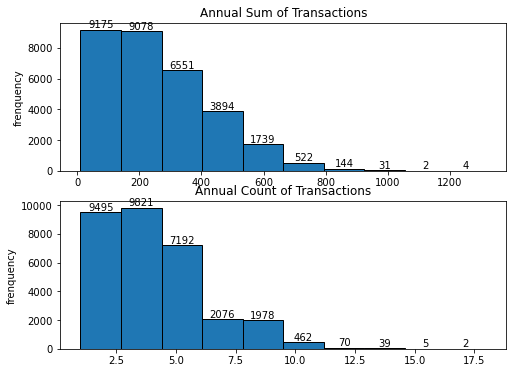

In [5]:
#1.2.2 histgrams of sum and count

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

counts, edges, bars = ax1.hist(clnt_annual_aggregations.ann_txn_amt_sum,ec="k")
ax1.bar_label(bars)
ax1.set_title('Annual Sum of Transactions')
ax1.set_ylabel('frenquency')

counts, edges, bars = ax2.hist(clnt_annual_aggregations.ann_txn_amt_cnt,ec="k")
ax2.bar_label(bars)
ax2.set_title('Annual Count of Transactions')
ax2.set_ylabel('frenquency')

In [6]:
#1.2.3 reset index,reshape table, fill missing values
clnt_annual_aggregations_pivot = pd.pivot_table(clnt_annual_aggregations,
                                                columns=['YEAR'],index=['customer_id'],
                                                values = clnt_annual_aggregations.columns)
clnt_annual_aggregations_pivot.fillna(0,inplace=True)
clnt_annual_aggregations_pivot

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   
...                     ...        ...        ...        ...        ...   
CS8996            31.000000  33.666667  41.500000  56.000000   0.000000   
CS8997            45.000000  39.500000  35.166667  42.000000   0.000000   
CS8998            64.000000  54.400000  47.000000  32.500000   0.000000   
CS8999            52.000000  25.250000  28.000000  21.000000   0.000000   
CS9000            19.500000  54.000000  73.500000  24.250000  34.000000   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum         \
YEAR                   2011 2012 2013 2014 2015  ...            2011   2012   
customer_id                                      ...                          
CS1112                  3.0  5.0  3.0  3.0  1.0  ...           212.0  337.0   
CS1113                  3.0  5.0  5.0  4.0  3.0  ...           244.0  374.0   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...           426.0  150.0   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...           261.0  473.0   
CS1116                  4.0  3.0  1.0  5.0  0.0  ...           235.0  230.0   
...                     ...  ...  ...  ...  ...  ...             ...    ...   
CS8996                  2.0  3.0  2.0  6.0  0.0  ...            62.0  101.0   
CS8997                  2.0  4.0  6.0  2.0  0.0  ...            90.0  158.0   
CS8998                  2.0  5.0  2.0  4.0  0.0  ...           128.0  272.0   
CS8999                  3.0  4.0  3.0  2.0  0.0  ...           156.0  101.0   
CS9000                  2.0  4.0  2.0  4.0  1.0  ...            39.0  216.0   

                                 ann_txn_amt_var                           \
YEAR          2013   2014   2015            2011        2012         2013   
customer_id                                                                 
CS1112       212.0  212.0   39.0      485.333333  161.800000  1190.333333   
CS1113       426.0  226.0  220.0      444.333333  290.200000   171.200000   
CS1114       352.0  425.0   79.0       94.700000  968.000000   619.300000   
CS1115       557.0  313.0   55.0      225.000000  477.285714   110.952381   
CS1116        59.0  333.0    0.0      449.583333  908.333333     0.000000   
...            ...    ...    ...             ...         ...          ...   
CS8996        83.0  336.0    0.0       98.000000   20.333333   144.500000   
CS8997       211.0   84.0    0.0        8.000000   45.666667   441.366667   
CS8998        94.0  130.0    0.0       50.000000  505.300000  1568.000000   
CS8999        84.0   42.0    0.0      333.000000   21.583333   103.000000   
CS9000       147.0   97.0   34.0       24.500000  281.333333    12.500000   

                                     
YEAR               2014        2015  
customer_id                          
CS1112       284.333333    0.000000  
CS1113       781.666667  745.333333  
CS1114       726.166667    0.000000  
CS1115       512.250000    0.000000  
CS1116       636.800000    0.000000  
...                 ...         ...  
CS8996       481.600000    0.000000  
CS8997        18.000000    0.000000  
CS8998       219.666667    0.000000  
CS8999        18.000000    0.000000  
CS9000        68.250000    0.000000  

[6889 rows x 40 columns]

#### Only the columns of standard deviation, variance and standard error of mean contain missing values, which could be attributed to the situation that the customer spent the same amount each time in a given year, lead the three valus meaningless, so lets fill them with 0.
#### As the data is based on 5 years, and each contains 8 columns of info, so we get 40 columns if we aggregate them.

In [7]:
#1.2.4 confirm the multiple levels of the columns with the following two expressions.

print('Number of levels:',clnt_annual_aggregations_pivot.columns.nlevels)
clnt_annual_aggregations_pivot.columns

Number of levels: 2


MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt

#### The number of levels indicated the amount of levels in each multi-index.

In [8]:
#1.2.5  save the dataframe clnt annual aggregations pivot as an.xlsx file for future use in the machine 
# learning assignment

level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)   #get level0 index
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)  #get level1 index
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1  #combine the 2-level index into a sigle-level index
clnt_annual_aggregations_pivot.to_excel('annual_features.xlsx')
clnt_annual_aggregations_pivot

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3.0,5.0,3.0,3.0,1.0,...,212.0,337.0,212.0,212.0,39.0,485.333333,161.800000,1190.333333,284.333333,0.000000
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3.0,5.0,5.0,4.0,3.0,...,244.0,374.0,426.0,226.0,220.0,444.333333,290.200000,171.200000,781.666667,745.333333
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5.0,2.0,5.0,6.0,1.0,...,426.0,150.0,352.0,425.0,79.0,94.700000,968.000000,619.300000,726.166667,0.000000
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3.0,7.0,7.0,4.0,1.0,...,261.0,473.0,557.0,313.0,55.0,225.000000,477.285714,110.952381,512.250000,0.000000
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4.0,3.0,1.0,5.0,0.0,...,235.0,230.0,59.0,333.0,0.0,449.583333,908.333333,0.000000,636.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2.0,3.0,2.0,6.0,0.0,...,62.0,101.0,83.0,336.0,0.0,98.000000,20.333333,144.500000,481.600000,0.000000
CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2.0,4.0,6.0,2.0,0.0,...,90.0,158.0,211.0,84.0,0.0,8.000000,45.666667,441.366667,18.000000,0.000000
CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2.0,5.0,2.0,4.0,0.0,...,128.0,272.0,94.0,130.0,0.0,50.000000,505.300000,1568.000000,219.666667,0.000000


#### 1.2.6 possible disadvantages in capturing client transaction behavior with the annual features here
* We could not learn or monitor the buying behavior of the customer well according to the annual features. The trend of the tansactions are not shown clearly. If the product is seasonal, like down coat, or holiday product, like Holloween costume, we could not use the annual features to benifit the prediction or production. The sales of cold brew or hot chocolate even differ in different periods given a year.



## 1.3 Create monthly aggregations

In [9]:
#1.3.1 Create the dataframe that captures the monthly sum and count of transactions per client
clnt_monthly_aggregations = txn.groupby(['customer_id','ME_DT']).tran_amount.agg([sum,'count'])   
clnt_monthly_aggregations.rename(columns = {'sum':'mth_txn_amt_sum','count':'mth_txn_amt_cnt'},inplace=True)
clnt_monthly_aggregations 

mth_txn_amt_sum  mth_txn_amt_cnt
customer_id ME_DT                                       
CS1112      2011-06-30               56                1
            2011-08-31               96                1
            2011-10-31               60                1
            2012-04-30               56                1
            2012-06-30               52                1
...                                 ...              ...
CS9000      2014-01-31               16                1
            2014-05-31               20                1
            2014-07-31               26                1
            2014-08-31               35                1
            2015-02-28               34                1

[103234 rows x 2 columns]

Text(0, 0.5, 'frenquency')

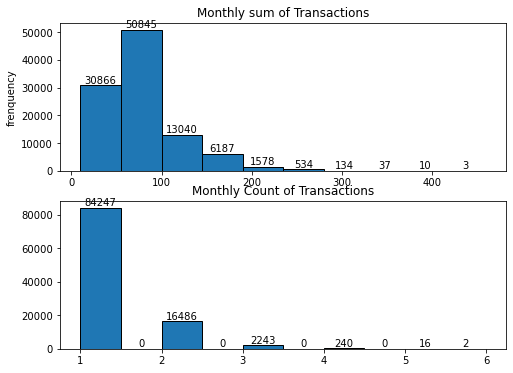

In [10]:
#1.3.1 histogram of both columns you created, What are your observations? What are the most common and maximum 
#values for each column? How do they compare with the ones in section 1.2?

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))
counts, edges, bars = ax1.hist(clnt_monthly_aggregations.mth_txn_amt_sum,ec="k")
ax1.bar_label(bars)
ax1.set_title('Monthly sum of Transactions')
ax1.set_ylabel('frenquency')

counts, edges, bars = ax2.hist(clnt_monthly_aggregations.mth_txn_amt_cnt,ec="k")
ax2.bar_label(bars)
ax2.set_title('Monthly Count of Transactions')
ax1.set_ylabel('frenquency')

In [11]:
print('maximum of annual sum:',clnt_annual_aggregations.ann_txn_amt_sum.max())
print('maximum of monthly sum:',clnt_monthly_aggregations.mth_txn_amt_sum.max())
print('maximum of annual count:',clnt_annual_aggregations.ann_txn_amt_cnt.max())
print('maximum of monthly count:',clnt_monthly_aggregations.mth_txn_amt_cnt.max())
print('mode of annual sum:',clnt_annual_aggregations.ann_txn_amt_sum.mode()[0])
print('mode of monthly sum:',clnt_monthly_aggregations.mth_txn_amt_sum.mode()[0])
print('mode of annual count:',clnt_annual_aggregations.ann_txn_amt_cnt.mode()[0])
print('mode of monthly count:',clnt_monthly_aggregations.mth_txn_amt_cnt.mode()[0])

maximum of annual sum: 1317
maximum of monthly sum: 460
maximum of annual count: 18
maximum of monthly count: 6
mode of annual sum: 97
mode of monthly sum: 77
mode of annual count: 3
mode of monthly count: 1


For monthly transactions, the most common sum was below 150(77 actually),and the maximum transaction was above 400.(actually 460). The most of the customer only bought once, the highest time of transaction was 6.

But for annual transactions, the most common sum was below 100(97 actully), and the maximum was more than above 1200 (actually 1317). The most of the customer bought 3 times, the highest time of transaction was 18.

So we can see the transactions were not regular within a year. Both of the annual maximum times of buying and the annual maximum sum of transactions were just about 3 times of the monthly data. The modes also proved that the product/service was seasonal.

In [12]:
# confirm output dataframe for client with ID CS1112 with slicing the output dataframe)
clnt_monthly_aggregations.loc['CS1112']

,mth_txn_amt_sum,mth_txn_amt_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


## 1.4 Create the base table for the rolling feature windows

In [13]:
#1.4.1 unique elements in columns ’customer id’ and ’ME DT’
import numpy as np

clnt_no =txn.customer_id.unique()
me_dt=txn.ME_DT.unique()
unique_id_month =np.array([clnt_no,me_dt], dtype=object)
print("There are {} unique clients, and {} unique month-end-dates.".format(clnt_no.shape[0],me_dt.shape[0]))

There are 6889 unique clients, and 47 unique month-end-dates.


In [14]:
#1.4.2  Generate all the possible combinations of ’customer id’ and ’ME DT’.
from itertools import product
#generate all the possible combinations
base_table = product(clnt_no , me_dt)
#type(base_table)   #confirm

#1.4.3 convert the itertools.product object base table into a pandas object called base table pd.
base_table_pd=pd.DataFrame.from_records(base_table, columns=['CLNT_NO', 'ME_DT'])
base_table_pd

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31
...,...,...
323778,CS8077,2011-08-31
323779,CS8077,2012-09-30
323780,CS8077,2014-09-30
323781,CS8077,2014-02-28


In [15]:
#1.4.4 validate that you created the table you originally wanted

# method 1:
base_range_1112 = base_table_pd[base_table_pd.CLNT_NO == 'CS1112'].ME_DT   #range of base_table for id_1112
origin_range_1112 = txn[txn.customer_id=='CS1112'].txn_date.agg([min,max])   #range of originalid_1112
print('Month of id_1112 fall in the range:\n',origin_range_1112.between(base_range_1112.min(),base_range_1112.max()))   #original month range bwtween the base range for id_1112

# method 2:
print('\nNumber of rows for Client CS1112:',base_range_1112.shape[0])
print('\nTotle Number of rows in base_table: ',base_table_pd.shape[0])

Month of id_1112 fall in the range:
 min    True
max    True
Name: txn_date, dtype: bool

Number of rows for Client CS1112: 47

Totle Number of rows in base_table:  323783


## 1.5 Create the monthly rolling window features

In [16]:
#1.5.1 Left-join the base table pd with the clnt monthly aggregations table on [CLNT NO, ME DT] to create the table base clnt mth
base_clnt_mth= base_table_pd.join(clnt_monthly_aggregations,on=['CLNT_NO','ME_DT'])
base_clnt_mth.fillna(0,inplace=True)    
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,0.0,0.0
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0
...,...,...,...,...
323778,CS8077,2011-08-31,30.0,1.0
323779,CS8077,2012-09-30,0.0,0.0
323780,CS8077,2014-09-30,0.0,0.0
323781,CS8077,2014-02-28,0.0,0.0


#### Observations:
* There are missing values as the customer had zero value for transaction amount in that month. So I filled them with value 0.
* 323783 rows, as expected with the same numbers of rows of base_table. The main difference of base_clnt_mth and clnt_monthly_aggregations is that, the first one contains value 0 if there is no transaction in that month, but the later one just drop these months. The customer id and end of each month here are also presented as columns, instead of 2-level index in clnt_monthly_aggregations.



In [17]:
#1.5.2 calculation of the rolling window features
base_clnt_mth=base_clnt_mth.sort_values(by=['CLNT_NO','ME_DT'])
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,34.0,1.0


In [18]:
#1.5.3 calculate separately the 3, 6 and 12-month rolling window features
rolling_features_3M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum',
                                                          'mth_txn_amt_cnt']].rolling(3).agg([sum,'mean',max])
rolling_features_6M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum',
                                                          'mth_txn_amt_cnt']].rolling(6).agg([sum,'mean',max])
rolling_features_12M = base_clnt_mth.groupby(['CLNT_NO'])[['mth_txn_amt_sum',
                                                          'mth_txn_amt_cnt']].rolling(12).agg([sum,'mean',max])
rolling_features_3M   #show 3-month rolling table

mth_txn_amt_sum                  mth_txn_amt_cnt               
                           sum       mean   max             sum      mean  max
CLNT_NO                                                                       
CS1112  157064             NaN        NaN   NaN             NaN       NaN  NaN
        157058             NaN        NaN   NaN             NaN       NaN  NaN
        157044            56.0  18.666667  56.0             1.0  0.333333  1.0
        157069           152.0  50.666667  96.0             2.0  0.666667  1.0
        157060            96.0  32.000000  96.0             1.0  0.333333  1.0
...                        ...        ...   ...             ...       ...  ...
CS9000  295140             0.0   0.000000   0.0             0.0  0.000000  0.0
        295126             0.0   0.000000   0.0             0.0  0.000000  0.0
        295119             0.0   0.000000   0.0             0.0  0.000000  0.0
        295136            34.0  11.333333  34.0             1.0  0.333333  1.0
        295114            34.0  11.333333  34.0             1.0  0.333333  1.0

[323783 rows x 6 columns]

* How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear?

The number of rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows is 2,5,11 repspectively. As the first rolling would appear in the ith(i=3/6/12) row for each client, so the first i-1 rows are meaningless, shown with missing values.

* How many levels do the index and columns have? Are these MultiIndex dataframes?

Two-level index, two-level columns. Yes, they are multiIndex dataframes.


In [19]:
# Rename the columns  Rename the columns as: ’amt sum 3M’, ’amt mean 3M’, ’amt max 3M’,’txn cnt sum 3M’, ’txn cnt mean 3M’, ’txn cnt max 3M’ and follow the same naming convention for 6M and 12M.
#rolling_features_3M = rolling_features_3M.columns.droplevel(0)
rolling_features_3M.set_axis(['amt_sum_3M','amt_mean_3M','amt_max_3M',
                                       'txn_cnt_sum_3M', 'txn_cnt_mean_3M','txn_cnt_max_3M'],axis=1,inplace=True)
rolling_features_6M.set_axis(['amt_sum_6M','amt_mean_6M','amt_max_6M',
                                       'txn_cnt_sum_6M', 'txn_cnt_mean_6M','txn_cnt_max_6M'],axis=1,inplace=True)
rolling_features_12M.set_axis(['amt_sum_12M','amt_mean_12M','amt_max_12M',
                                       'txn_cnt_sum_12M', 'txn_cnt_mean_12M','txn_cnt_max_12M'],axis=1,inplace=True)

In [20]:
#1.5.4 Merge the 4 tables.
rolling_features_3M.index = rolling_features_3M.index.droplevel(0)
rolling_features_6M.index = rolling_features_6M.index.droplevel(0)
rolling_features_12M.index = rolling_features_12M.index.droplevel(0)
all_rolling_features=pd.concat([base_clnt_mth,rolling_features_3M,rolling_features_6M,rolling_features_12M],axis=1)
print(all_rolling_features.shape,'==> shape approved')    #1.5.5 shape approved
all_rolling_features.head()

(323783, 22) ==> shape approved


,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
all_rolling_features.to_excel('mth_rolling_features.xlsx')

## 1.6 Date-related features: date of the week

In [22]:
#1.6.1 extract the day of the week
txn_with_days = txn.copy()
txn_with_days['day_of_the_week']=txn_with_days.txn_date.dt.dayofweek
txn_with_days['day_name']=txn_with_days.txn_date.dt.day_name()
txn_with_days

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


Text(0.5, 1.0, 'counts of transactions by week of the day')

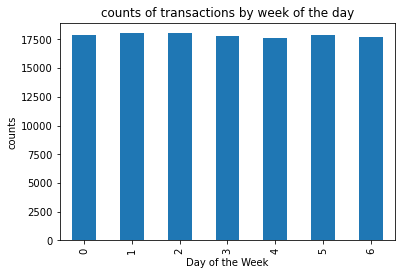

In [23]:
#1.6.2 bar plot that shows the count of transactions per day of the week
txn_with_days['day_of_the_week'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('counts')
plt.title('counts of transactions by week of the day')
#txn_with_days.day_of_the_week.plot(kind='bar')

In [24]:
#1.6.3 generate the features that capture the count of transactions per client, year and day of the week.
clnt_annual_day_of_week_counts_aggregations = txn_with_days.groupby(['customer_id','YEAR','day_name']).day_of_the_week.agg(['count']).rename(columns={'count':'cnt'})
clnt_annual_day_of_week_counts_aggregations_pivot = pd.pivot_table(clnt_annual_day_of_week_counts_aggregations,
                                                 columns=['YEAR','day_name'],index=['customer_id'],fill_value='0')
clnt_annual_day_of_week_counts_aggregations_pivot= clnt_annual_day_of_week_counts_aggregations_pivot.astype(int)
clnt_annual_day_of_week_counts_aggregations_pivot

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996           0      1        0      0        0       1         0      0   
CS8997           0      0        0      0        1       0         1      1   
CS8998           0      0        0      0        0       1         1      2   
CS8999           0      1        1      0        0       1         0      1   
CS9000           0      0        0      2        0       0         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996           0        3  ...        1       1         2      0      0   
CS8997           2        0  ...        0       0         0      0      0   
CS8998           0        0  ...        0       1         1      0      0   
CS8999           0        2  ...        0       0         2      0      0   
CS9000           0        1  ...        1       1         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  
...              ...    ...      ...     ...       ...  
CS8996             0      0        0       0         0  
CS8997             0      0        0       0         0  
CS8998             0      0        0       0         0  
CS8999             0      0        0       0         0  
CS9000             1      0        0       0         0  

[6889 rows x 35 columns]

In [25]:
level_0_new = clnt_annual_day_of_week_counts_aggregations_pivot.columns.get_level_values(0).astype(str)   #get level0 index
level_1_new = clnt_annual_day_of_week_counts_aggregations_pivot.columns.get_level_values(1).astype(str) 
level_2_new = clnt_annual_day_of_week_counts_aggregations_pivot.columns.get_level_values(2).astype(str)
clnt_annual_day_of_week_counts_aggregations_pivot.columns = level_0_new + '_' + level_1_new+'_'+level_2_new 
clnt_annual_day_of_week_counts_aggregations_pivot

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0,1,0,0,0,1,0,0,0,3,...,1,1,2,0,0,0,0,0,0,0
CS8997,0,0,0,0,1,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
CS8998,0,0,0,0,0,1,1,2,0,0,...,0,1,1,0,0,0,0,0,0,0


In [26]:
#1.6.4 Confirm the output has the same number of rows as the final output in section 1.2
print('Number of rows:',clnt_annual_day_of_week_counts_aggregations_pivot.shape[0])
print('The same number of rows as the final output in section 1.2:',clnt_annual_aggregations_pivot.shape[0]==clnt_annual_day_of_week_counts_aggregations_pivot.shape[0])
clnt_annual_day_of_week_counts_aggregations_pivot.to_excel('annual_day_of_week_counts_pivot.xlsx')

Number of rows: 6889
The same number of rows as the final output in section 1.2: True


In [27]:
#1.6.5 generate the features that capture the count of transactions per client, month-end-date and day of the week.
clnt_monthly_day_of_week_counts_aggregations = txn_with_days.groupby(['customer_id','ME_DT','day_name']).day_of_the_week.agg(['count']).rename(columns={'count':'cnt'})
clnt_monthly_day_of_week_counts_aggregations_pivot=pd.pivot_table(clnt_monthly_day_of_week_counts_aggregations,index=['customer_id','ME_DT'], columns=['day_name'], fill_value='0').astype(int)
level_0_here = clnt_monthly_day_of_week_counts_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1_here = clnt_monthly_day_of_week_counts_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_monthly_day_of_week_counts_aggregations_pivot.columns = level_0_here+'_'+level_1_here
clnt_monthly_day_of_week_counts_aggregations_pivot

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   
...                            ...         ...           ...         ...   
CS9000      2014-01-31           0           0             0           1   
            2014-05-31           0           0             0           0   
            2014-07-31           0           0             0           0   
            2014-08-31           0           0             0           1   
            2015-02-28           0           0             1           0   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0  
...                              ...          ...            ...  
CS9000      2014-01-31             0            0              0  
            2014-05-31             1            0              0  
            2014-07-31             0            1              0  
            2014-08-31             0            0              0  
            2015-02-28             0            0              0  

[103234 rows x 7 columns]

In [28]:
# 1.6.6 join with base table pd 
mth_day_counts= base_table_pd.join(clnt_monthly_day_of_week_counts_aggregations_pivot,on=['CLNT_NO','ME_DT'])
mth_day_counts.fillna(0,inplace=True)  
mth_day_counts=mth_day_counts.sort_values(by=['CLNT_NO','ME_DT'])
mth_day_counts.to_excel('mth_day_counts.xlsx')
mth_day_counts

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
157064,CS1112,2011-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157058,CS1112,2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0
157044,CS1112,2011-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157069,CS1112,2011-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0
157060,CS1112,2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295136,CS9000,2015-02-28,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 1.7 Date-related features: days since last transactions

In [29]:
#1.7.1 capture the last transaction in a month for every client.
temp = txn[['txn_date','ME_DT','customer_id']]
last_monthly_purchase = temp.groupby(['customer_id','ME_DT']).txn_date.agg([max])
last_monthly_purchase.rename(columns={'max':'last_monthly_purchase'},inplace=True)
last_monthly_purchase

last_monthly_purchase
customer_id ME_DT                           
CS1112      2011-06-30            2011-06-15
            2011-08-31            2011-08-19
            2011-10-31            2011-10-02
            2012-04-30            2012-04-08
            2012-06-30            2012-06-24
...                                      ...
CS9000      2014-01-31            2014-01-12
            2014-05-31            2014-05-08
            2014-07-31            2014-07-08
            2014-08-31            2014-08-24
            2015-02-28            2015-02-28

[103234 rows x 1 columns]

In [30]:
#1.7.2 Join base table pd with last monthly purchase
last_monthly_purchase_base = base_table_pd.join(last_monthly_purchase,on=['CLNT_NO','ME_DT'])
last_monthly_purchase_base.sort_values(by=['CLNT_NO','ME_DT'],inplace=True)   #NaT stands for ”Not a Timestamp
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT
...,...,...,...
295140,CS9000,2014-11-30,NaT
295126,CS9000,2014-12-31,NaT
295119,CS9000,2015-01-31,NaT
295136,CS9000,2015-02-28,2015-02-28


* Nat here means the one did not have transaction in the month of ME_DT. So I filled them with the date of the last tansaction below(forward-fill).

In [31]:
#1.7.3 forward-fill the NaT values.
last_monthly_purchase_base = last_monthly_purchase_base.groupby(['CLNT_NO']).apply(lambda x: x.ffill(axis=0))
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,2011-06-15
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,2011-08-19
...,...,...,...
295140,CS9000,2014-11-30,2014-08-24
295126,CS9000,2014-12-31,2014-08-24
295119,CS9000,2015-01-31,2014-08-24
295136,CS9000,2015-02-28,2015-02-28


In [32]:
#1.7.4 Subtract the two date columns and convert to .dt.days to calculate the column ’days since last txn’ 
last_monthly_purchase_base['days_since_last_txn']=(last_monthly_purchase_base.ME_DT -
                                                   last_monthly_purchase_base.last_monthly_purchase).dt.days
last_monthly_purchase_base

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
295140,CS9000,2014-11-30,2014-08-24,98.0
295126,CS9000,2014-12-31,2014-08-24,129.0
295119,CS9000,2015-01-31,2014-08-24,160.0
295136,CS9000,2015-02-28,2015-02-28,0.0


Text(0.5, 0, 'days')

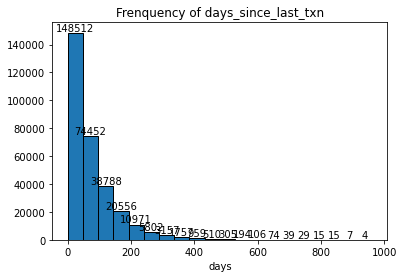

In [33]:
#1.7.5 histogram of the ’days_since_last_txn’, impute the remaining NaN values 
#Save the columns [’CLNT NO’, ’ME DT’, ’days since last txn’] as days_since_last_txn.xlsx.
counts, edges, bars = plt.hist(last_monthly_purchase_base.days_since_last_txn,bins=20,ec="k")
plt.bar_label(bars)
plt.title('Frenquency of days_since_last_txn')
plt.xlabel('days')

In [34]:
print("The most frequent days since last transaction:", last_monthly_purchase_base.days_since_last_txn.mode()[0])

The most frequent days since last transaction: 1.0


From the graph, we see the most frequent days since last transaction is about 0-50 days(1 day actually). The rows with Nat for last_monthly_purchase will result in the apperance of NaN for days_since_last_txn. From the start for each custmer, if the one does not make any transaction in May,2011, there would no information of the last monthly purchase, which means there will be no actual values for the days since last transaction. And if the one does not make any transactions in the each later month,the last monthly purchase will continue to be NaT(missing), which would  also lead to a missing value for days_since_last_txn in that following month, from May,2011. As one day since last transaction is the most frequent, I assume each of them made a transaction one day before the end of the April,2011, means a transaction would be token on April,29,2011. So the first missing value for each customer would be imputed as 1+31(31 days in May)=32 days. And the next NaN(if missing)would be the 32+the days of the month,and so on...

In [35]:
#fill the first NaN of each customer
filled_first=last_monthly_purchase_base.loc[last_monthly_purchase_base.index[last_monthly_purchase_base.ME_DT=='2011-05-31'],
                                              'days_since_last_txn'].replace(np.nan, 32)
last_monthly_purchase_base.loc[filled_first.index.values,'days_since_last_txn']=filled_first.values

#fill the rest
last_monthly_purchase_base['diff']=last_monthly_purchase_base.ME_DT.diff().dt.days    #add a column with values=number of days in each month
other_na_location = np.where(last_monthly_purchase_base['days_since_last_txn'].isna())[0]  #location of NaN

#add the days_since_last_txn of the last month and the number of days in that month
for i in other_na_location:
    last_monthly_purchase_base.iloc[i,3]= last_monthly_purchase_base.iloc[i-1,3]+last_monthly_purchase_base.iloc[i,4]

#drop the number of days column, named'diff'
last_monthly_purchase_base.drop(columns = 'diff',inplace=True)

#check remaining missing values
print("Is there any NaN values?",last_monthly_purchase_base.days_since_last_txn.isna().any())
last_monthly_purchase_base

Is there any NaN values? False


,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
157064,CS1112,2011-05-31,NaT,32.0
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
295140,CS9000,2014-11-30,2014-08-24,98.0
295126,CS9000,2014-12-31,2014-08-24,129.0
295119,CS9000,2015-01-31,2014-08-24,160.0
295136,CS9000,2015-02-28,2015-02-28,0.0


In [36]:
#show the CS1115 as an example
last_monthly_purchase_base[last_monthly_purchase_base.CLNT_NO=='CS1115'].head(5)

,CLNT_NO,ME_DT,last_monthly_purchase,days_since_last_txn
195980,CS1115,2011-05-31,NaT,32.0
195974,CS1115,2011-06-30,NaT,62.0
195960,CS1115,2011-07-31,NaT,93.0
195985,CS1115,2011-08-31,2011-08-10,21.0
195976,CS1115,2011-09-30,2011-09-11,19.0


In [37]:
#save in xlsx. file
last_monthly_purchase_base[['CLNT_NO', 'ME_DT', 'days_since_last_txn']].to_excel('days_since_last_txn.xlsx')